## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [1]:
# import libaries for dataframes, numeric library, to enable plotting graphs, for statistical plots 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import scikit-learn libaries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

### 2. Load the dataset and display a sample of five rows of the data frame.

In [4]:
data = pd.read_csv('heart_2020_cleaned.csv')
df = data.copy()

In [5]:
df.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
95832,Yes,18.31,No,No,No,0.0,0.0,No,Male,18-24,White,No,Yes,Very good,8.0,Yes,No,No
263701,No,59.02,No,No,No,0.0,0.0,Yes,Female,18-24,Hispanic,No,Yes,Very good,8.0,No,No,No
150039,No,27.26,No,No,No,0.0,0.0,No,Male,70-74,Black,Yes,No,Fair,10.0,No,No,No
193424,No,28.70,No,No,No,0.0,0.0,No,Male,60-64,White,No,Yes,Very good,8.0,No,No,No
215054,No,27.76,Yes,No,No,0.0,0.0,No,Male,50-54,Hispanic,No,Yes,Fair,8.0,No,No,No


In [6]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [7]:
df.shape

(319795, 18)

- Dataset has 18 columns and 319795 rows

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 4. Check the statistical summary of the dataset and write your inferences.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


- The Min and Max Values of "BMI" are 12.02 and 94.85 with an average value of 28.32
- The Min and Max Values of "Physical Health" are 0 and 30 with an average value of 3.37.
- The Min and Max Values of "Mental Health" is 0 and 30 with an average value of 3.89.
- The Min and Max Values of "Sleep Time" is 1 and 24 with an average value of 7.09.


In the given data we can infer that the Minimum BMI value is 12.02, which is considered underweight. The Maximum BMI value is 94.85, which is well into the obese range. The average BMI value of 28.32 falls within the overweight range.

The data for Measure of Physical Health with an average value of 3.37 suggests that on average, people reported nearly 3-4 days in the past month where they experienced physical illness or injury.

The data for Mental Health with an average value of 3.89 suggests that on average, people reported nearly 4 days in the past month where they felt their mental health was not good.

The data for Sleep Time with an average value of 7.09 suggests that on average, people are getting just over 7 hours of sleep per day.


In [10]:
df.describe(include='O').T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


- **HeartDisease:** Out of 319,795 respondents, the majority (292,422) have not reported having coronary heart disease (CHD) or myocardial infarction (MI).

- **Smoking:** Most respondents (187,887) have not smoked at least 100 cigarettes in their entire life.

- **AlcoholDrinking:** A large number of respondents (298,018) are not heavy drinkers.

- **Stroke:** Most respondents (307,726) have not had a stroke.

- **DiffWalking:** The majority of respondents (275,385) do not have serious difficulty walking or climbing stairs.

- **Sex:** The dataset is almost evenly split between males and females, with slightly more females (167,805).

- **AgeCategory:** The age group with the most respondents is 65-69 years old (34,151).

- **Race:** The majority of respondents (245,212) are White.

- **Diabetic:** Most respondents (269,653) do not have diabetes.

- **PhysicalActivity:** Most respondents (247,957) reported doing physical activity or exercise during the past 30 days other than their regular job.

- **GenHealth:** The majority of respondents (113,858) rate their general health as “Very good”.

- **Asthma:** Most respondents (276,923) do not have asthma.

- **KidneyDisease:** The majority of respondents (308,016) have not been told they had kidney disease.

- **SkinCancer:** Most respondents (289,976) have not had skin cancer.

### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [11]:
df.isnull().sum()/len(df)*100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

#### Another way of Solution

In [12]:
df.isnull().mean()*100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

- There are No Missing Values in the Dataset.


- As there is no missing values so no need to drop it but suppose if there are missing values then we can do this

            df.dropna(inplace= True)

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [13]:
duplicate = len(df[df.duplicated()])

print("Total duplicated rows are = ", duplicate)

Total duplicated rows are =  18078


In [14]:
df[df.duplicated()]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


In [15]:
df.drop_duplicates(inplace=True)

duplicate = len(df[df.duplicated()])

print("Total duplicated rows are = ", duplicate)

Total duplicated rows are =  0


In [16]:
print('Original Shape = ', data.shape)
print('Corrected Shape = ',df.shape)
print('Duplicated Rows Droped = ', (data.shape[0] - df.shape[0]))

Original Shape =  (319795, 18)
Corrected Shape =  (301717, 18)
Duplicated Rows Droped =  18078


### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

In [17]:
# Count the occurrences of each unique value in the 'HeartDisease' column
print("\n")
target_counts = df[['HeartDisease']].value_counts()
print(target_counts)

print("\n")
print("-"*30)
print("\n")

# Calculate the percentage distribution of the target variable [Normalization = (target_counts / len(df)) * 100]
target_distribution = df[['HeartDisease']].value_counts(normalize=True)*100

# Print the distribution of the target variable
print("In percentage :\n\n", target_distribution)



HeartDisease
No              274456
Yes              27261
dtype: int64


------------------------------


In percentage :

 HeartDisease
No              90.964712
Yes              9.035288
dtype: float64


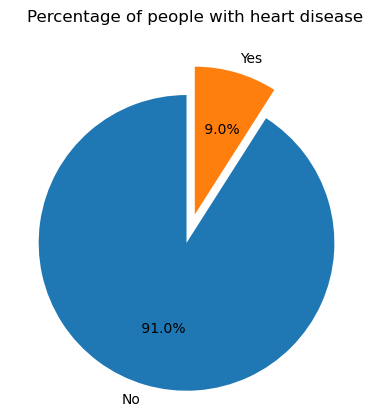

In [18]:
plt.pie(x=df["HeartDisease"].value_counts(),labels=df["HeartDisease"].unique(),autopct="% 1.1f%%",startangle=90, explode = [0.2, 0])
plt.title("Percentage of people with heart disease")
plt.show()

- Out of 301717 entries, 274456 were observed to have no heart disease where as 27261 were suffering from heart disease.

- This suggests that around 90.96% of people were having no prior heart disease where as 9.03% had heart disease

- The target class distribution is highly imbalanced.

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [19]:
cat_feature=df.select_dtypes(include='O')
cat_feature.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

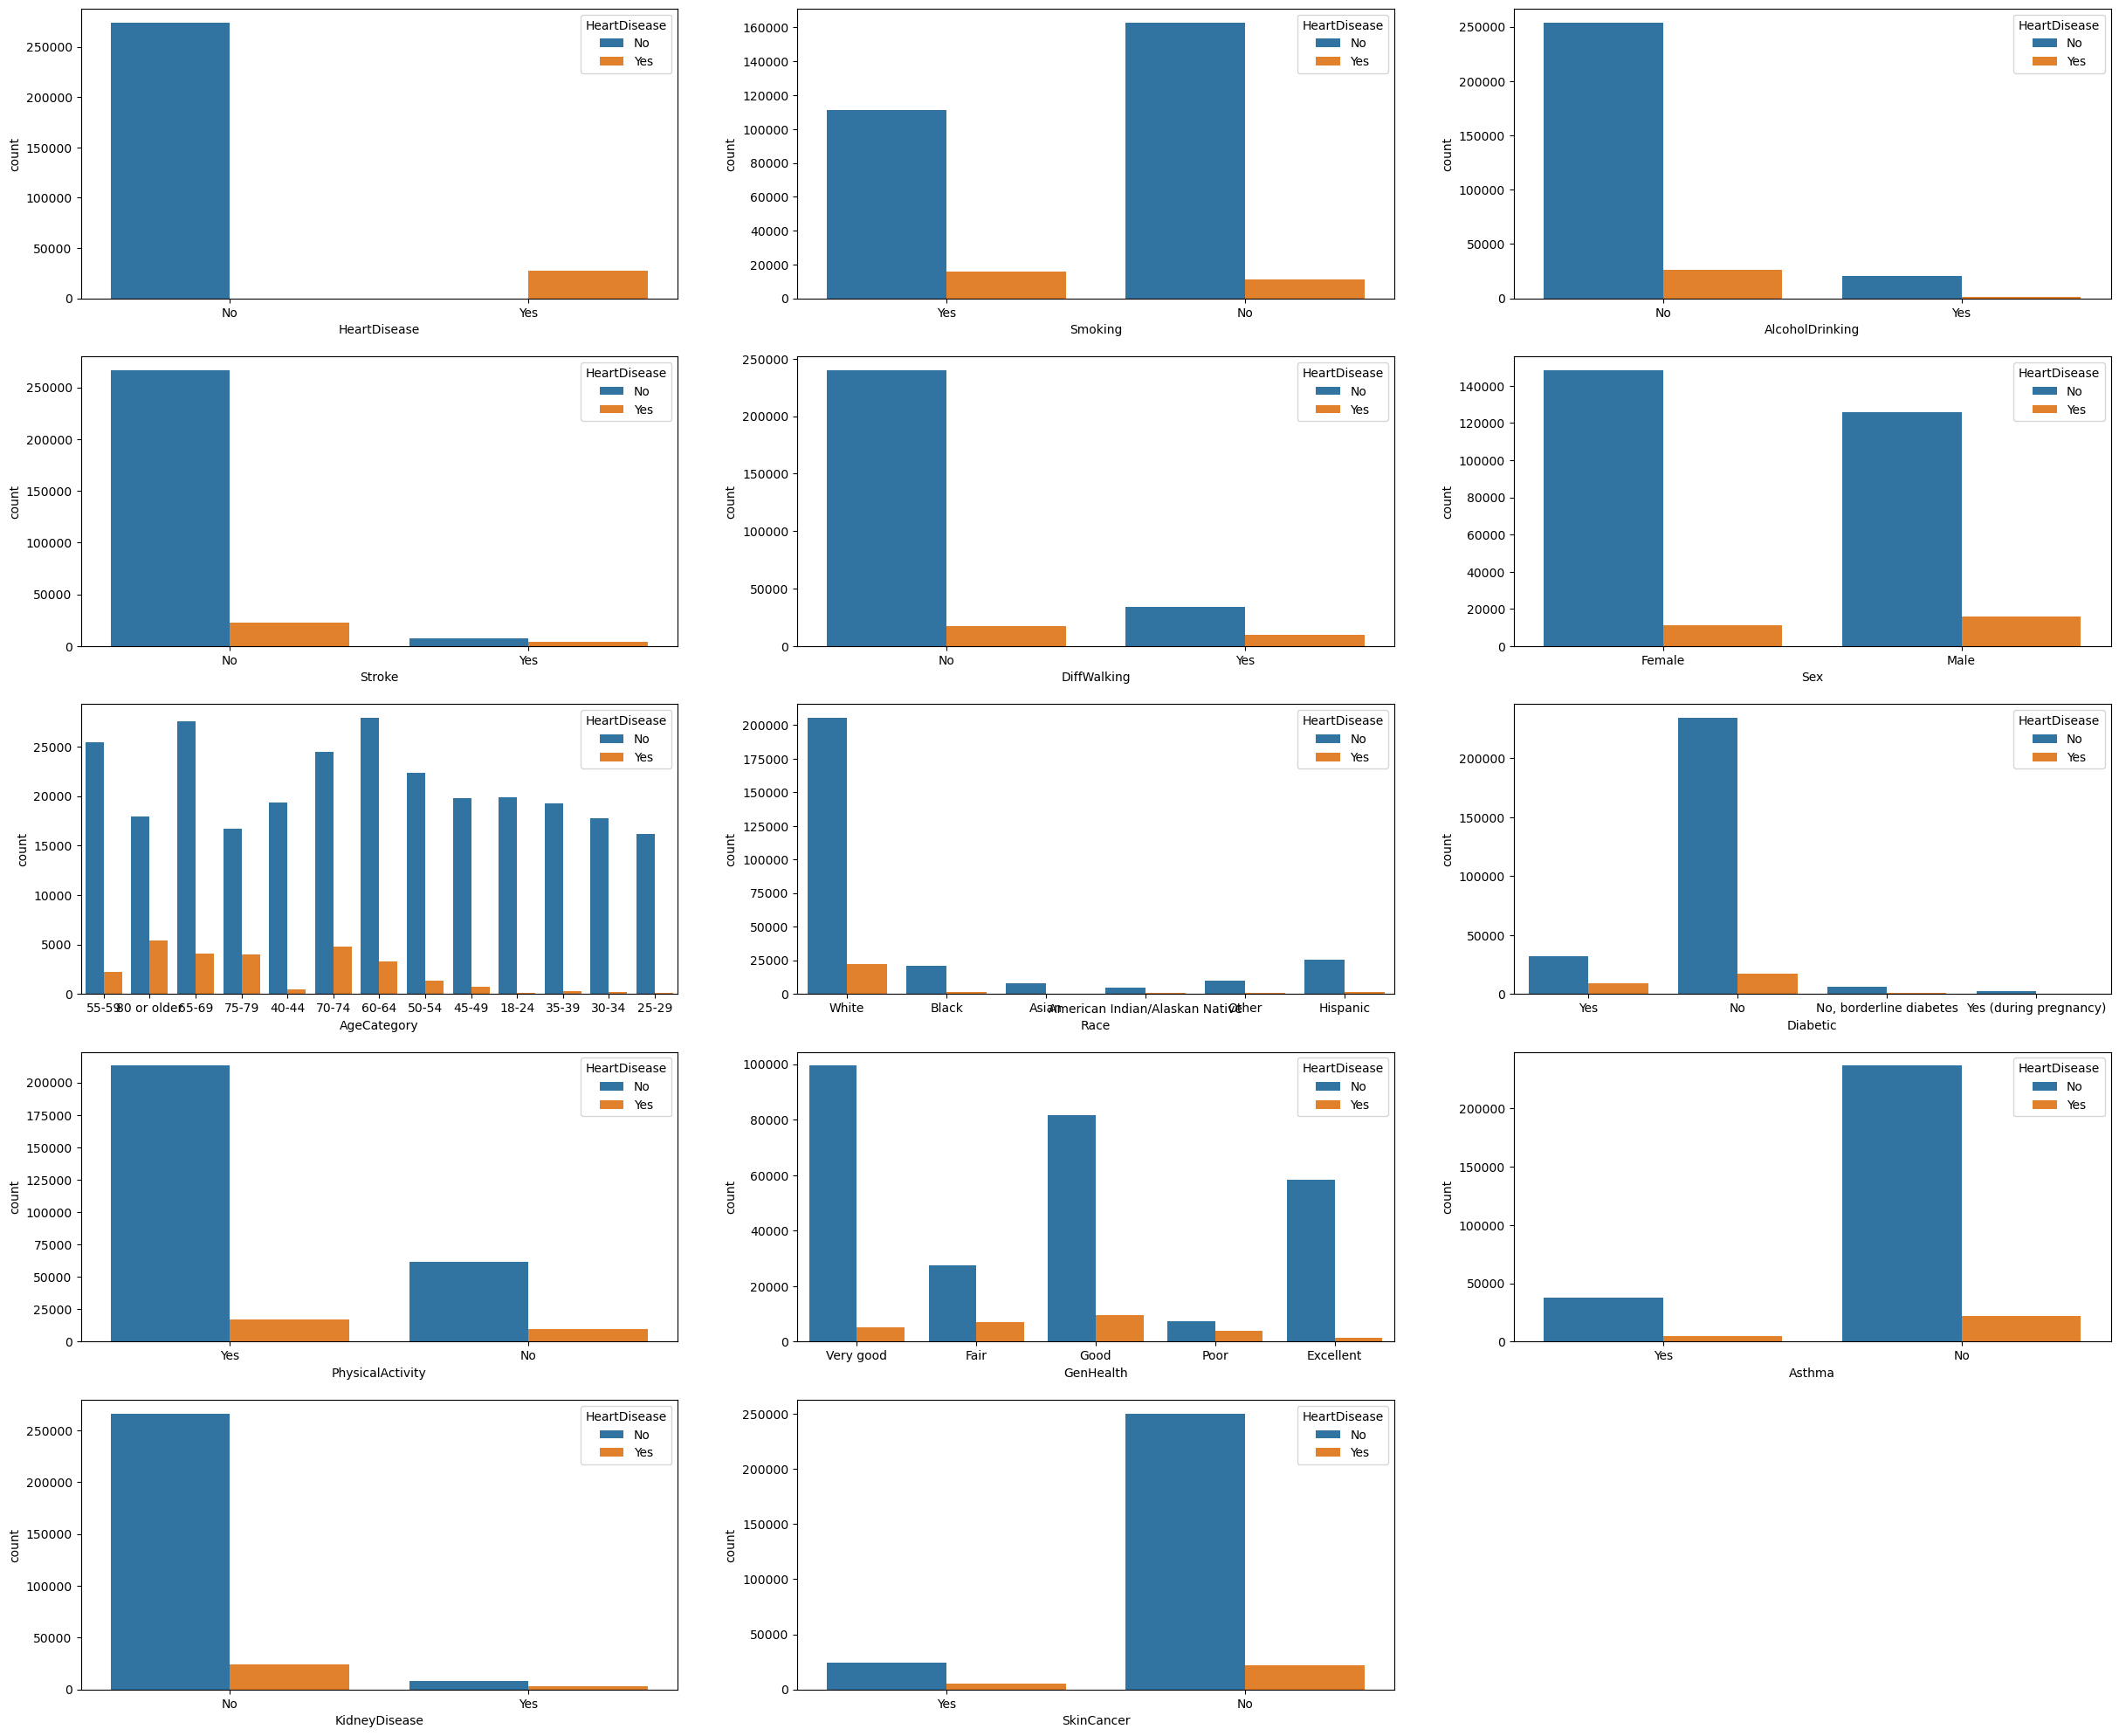

In [20]:
i=1
plt.figure(figsize=(30, 25))
for feature in cat_feature:
    plt.subplot(5, 3, i)
    sns.countplot(x=feature, hue='HeartDisease', data=df)
    i+=1

- According to the above representation
    - Smokers are more likely to develop Heart Disease.
    - Most people do not consume alcohol. The data shows that alcohol does not affect human heart.
    - most people didn't have any stroke.
    - Less people face walking difficulties but most of them also have heart problems.
    - most people with heart disease are good at physical activity.
    - Asthma, Kidney Disease, skin cancer, general health and diabetes are not causing heart disease.
    - Males are diagnosed with heart disease more than female. 
    - Old people are more likely to have heart disease.
    - Though, White peope are more in the dataset, this cannot be a valid conclusion. still the data shows - White people are more likely to have heart disease. 

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [21]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [22]:
df['Diabetic'].nunique()

4

In [23]:
df['Diabetic'].value_counts()

No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: Diabetic, dtype: int64

In [24]:
df['Diabetic'] = df['Diabetic'].replace({'Yes (during pregnancy)': 'Yes', 'No, borderline diabetes': 'No'})

In [25]:
df['Diabetic'].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
df['Diabetic'].nunique()

2

In [27]:
df['Diabetic'].value_counts()

No     258572
Yes     43145
Name: Diabetic, dtype: int64

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [28]:
df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
df['HeartDisease'].value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

In [30]:
df['HeartDisease'] = df['HeartDisease'].replace({'No':0 , 'Yes':1})

In [31]:
df['HeartDisease'].unique()

array([0, 1], dtype=int64)

In [32]:
df['HeartDisease'].value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [33]:
#Label Encoding the columns "AgeCategory", "Race", and "GenHealth"
# Define columns for label encoding
object_type_variables = [i for i in df[['AgeCategory', 'Race', 'GenHealth']] if df.dtypes[i] == object]
object_type_variables

# Initialize LabelEncoder
le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))
        df[i] = q
        df[i] = df[i].astype(int)
encoder(df)

In [34]:
#dummy encoding binary category columns
df = pd.get_dummies(df, drop_first=True)

In [35]:
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3.0,30.0,7,5,4,5.0,1,0,0,0,0,1,1,1,0,1
1,0,20.34,0.0,0.0,12,5,4,7.0,0,0,1,0,0,0,1,0,0,0
2,0,26.58,20.0,30.0,9,5,1,8.0,1,0,0,0,1,1,1,1,0,0
3,0,24.21,0.0,0.0,11,5,2,6.0,0,0,0,0,0,0,0,0,0,1
4,0,23.71,28.0,0.0,4,5,4,8.0,0,0,0,1,0,0,1,0,0,0


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [36]:
df.columns

Index(['HeartDisease', 'BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory',
       'Race', 'GenHealth', 'SleepTime', 'Smoking_Yes', 'AlcoholDrinking_Yes',
       'Stroke_Yes', 'DiffWalking_Yes', 'Sex_Male', 'Diabetic_Yes',
       'PhysicalActivity_Yes', 'Asthma_Yes', 'KidneyDisease_Yes',
       'SkinCancer_Yes'],
      dtype='object')

In [37]:
## Lets store the target column in the Y variable and the rest of the columns in the X variable.
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [38]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (301717, 17)
y shape: (301717,)


### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [39]:
# Split the dataset into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Print the shapes of train and test data
print(" X_train:", X_train.shape)
print(" X_test:", X_test.shape)
print(" y_train:", y_train.shape)
print(" y_test:", y_test.shape)

 X_train: (211201, 17)
 X_test: (90516, 17)
 y_train: (211201,)
 y_test: (90516,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [40]:
X_train.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
116459,20.60,30.0,0.0,6,5,2,7.0,1,0,0,1,0,0,0,0,0,0
133003,25.04,0.0,30.0,4,5,4,5.0,1,0,0,0,1,0,1,0,0,0
224177,33.64,3.0,0.0,6,5,2,7.0,1,0,0,0,1,0,0,1,0,0
209116,27.98,0.0,0.0,1,5,4,7.0,0,0,0,0,1,0,1,1,0,0
21754,37.11,15.0,30.0,5,3,1,9.0,0,0,0,0,0,1,1,0,0,0


In [41]:
X_test.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
232838,25.77,0.0,30.0,2,5,0,8.0,0,0,0,0,1,0,1,0,0,0
289715,32.12,0.0,0.0,5,2,4,7.0,1,0,0,0,0,0,1,1,0,0
103746,25.68,18.0,7.0,2,5,2,6.0,0,0,0,0,0,0,1,1,0,0
58350,17.71,0.0,0.0,7,5,4,8.0,1,0,0,0,0,0,1,0,0,0
37272,34.67,4.0,10.0,3,0,4,5.0,1,0,0,0,1,1,0,1,0,0


In [42]:
SS = StandardScaler()

In [43]:
X_train.iloc[:,:7] = SS.fit_transform(X_train.iloc[:,:7])
X_test.iloc[:,:7] = SS.transform(X_test.iloc[:,:7])

In [44]:
X_train.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
116459,-1.209986,3.246326,-0.507611,-0.139377,0.514284,-0.146007,-0.058302,1,0,0,1,0,0,0,0,0,0
133003,-0.523928,-0.438658,3.175214,-0.697459,0.514284,1.176809,-1.425085,1,0,0,0,1,0,1,0,0,0
224177,0.804924,-0.070159,-0.507611,-0.139377,0.514284,-0.146007,-0.058302,1,0,0,0,1,0,0,1,0,0
209116,-0.069646,-0.438658,-0.507611,-1.534582,0.514284,1.176809,-0.058302,0,0,0,0,1,0,1,1,0,0
21754,1.341100,1.403834,3.175214,-0.418418,-1.100388,-0.807415,1.308482,0,0,0,0,0,1,1,0,0,0


In [45]:
X_test.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
232838,-0.411130,-0.438658,3.175214,-1.255541,0.514284,-1.468823,0.625090,0,0,0,0,1,0,1,0,0,0
289715,0.570057,-0.438658,-0.507611,-0.418418,-1.907724,1.176809,-0.058302,1,0,0,0,0,0,1,1,0,0
103746,-0.425036,1.772333,0.351715,-1.255541,0.514284,-0.146007,-0.741693,0,0,0,0,0,0,1,1,0,0
58350,-1.656542,-0.438658,-0.507611,0.139664,0.514284,1.176809,0.625090,1,0,0,0,0,0,1,0,0,0
37272,0.964077,0.052674,0.719997,-0.976500,-3.522397,1.176809,-1.425085,1,0,0,0,1,1,0,1,0,0


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [46]:
def fit_and_predict(model,X_train,X_test,y_train,y_test):
    
    # Fit the model with train data
    model.fit(X_train,y_train)
    
    # Making prediction on test data
    prediction=model.predict(X_test)
    
    # Calculate the accuracy score
    accuracy=accuracy_score(y_test,prediction)
    
    return accuracy

In [47]:
# Testing the fit_and_predict function
lr= LogisticRegression()

Label = 'LogisticRegression'

rs = pd.DataFrame(columns=['Accuracy'])

rs.loc[Label]= fit_and_predict(lr,X_train,X_test,y_train,y_test)

rs

,Accuracy
LogisticRegression,0.909552


### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [48]:
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()


# Defining the base estimators for the Stacking Classifier
estimators = [('rf', rf),('knn', knn), ('gb', gb), ('adb', adb)]
sc = StackingClassifier(estimators=estimators, final_estimator=rf)

In [49]:
# Listing of models and their names
models = [lr, nb, knn, dt, rf, adb, gb, sc]
names = ['Logistic Regression','Naive Bayes','KNN','Decision tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'Stacking']

# Create a dictionary to store the scores
accuracy_scores = {} 

# Training each model and printing their accuracy
for model, name in zip(models, names):
    accuracy = fit_and_predict(model, X_train, X_test, y_train, y_test)
    accuracy_scores[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 0.9096
Naive Bayes Accuracy: 0.8406
KNN Accuracy: 0.9007
Decision tree Accuracy: 0.8545
Random Forest Accuracy: 0.8987
Ada Boost Accuracy: 0.9098
Gradient Boost Accuracy: 0.9101
Stacking Accuracy: 0.9050


In [50]:
best_model = max(accuracy_scores, key=accuracy_scores.get)
print(f"The best-performing model is {best_model} with an accuracy of {accuracy_scores[best_model]:.4f}")

The best-performing model is Gradient Boost with an accuracy of 0.9101


- The final best performing model when compared to other models was observed to be Gradient Boost with an accuracy of 0.9101
- These results suggest that ensemble methods such as Gradient Boost [0.9101], Ada Boost [0.9098], and Stacking [0.9050] generally perform better than single models such as Logistic Regression [0.9096], Naive Bayes [0.8406], KNN [0.9007], and Decision Tree [0.8545] on this particular dataset. This can be because ensemble methods combine the predictions of multiple models to improve the overall performance.
- We can also note that the difference in accuracy between the best performing model (Gradient Boost) and the worst performing model (Naive Bayes) is relatively small, at around 7%. This suggests that all of the models are able to capture some of the underlying patterns in the dataset, and some models are better at it than others.

**Steps to improve accuracy:**

- We can use hyperparameter tuning for the best-performing model to improve accuracy.
- Experiment with different feature engineering techniques.


### Conclusion

- **From EDA:-**
  - People who smoke have higher chances of heart diesease than no smokers
  - Male are more prone to suffer from heart diseases as compared to females
  - People with age limit in between 55-75 has higher chances of getting heart diseases
  - If person has difficulty in walking or climbing stairs there is a high probability that he or she is suffering from some heart disease
  - There are higher chances of a person having heart disease if he does not have any kidney disease.
- **From Model:-**
  - We see that the best performing models are Gradient Boost, Adaboost,Logistic Regression and KNN with around 91% accuracy.
  - Please note that the target class is highly imbalanced So, accuracy does not holds good for imbalanced data. Accuracy becomes poor measure of evaluation for our classification model in this context.
  - We can further go with evaluating the models based on the different performance metrics such as presicion, recall and F1score and choose the model accordingly.
  - Further we can apply sampling techniques and try to balance the data and build models based on that data will increase our model performance.
  - Also, we can tune the hyperparameters and find the best set of hyperparameters and building the models based on those will increase the classification performance of the model.

----
## Happy Learning:)
----